# Lead Scoring - Case Study


#### Business Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Objective

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1 : Importing Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

#import miscellaneous libraries
pd.set_option("display.max_columns",None)# Step 1 : Importing Libraries
pd.set_option("display.max_colwidth",200)

# Step 2 : Reading and Understanding Data

In [2]:
# Importing data from csv in a DataFrame

df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the dimensions of the dataframe
initial_rows=df.shape[0]
initial_columns=df.shape[1]
print("Number of rows in source data = {}".format(initial_rows))
print("Number of columns in source data = {}".format(initial_columns))

Number of rows in source data = 9240
Number of columns in source data = 37


In [4]:
# Checking statistical measures of the numeric attributes in the |dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking the metadata info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### In this step, we can observe:
1) that there are Categorical variables for which we would need to create dummy variables.

2) there are null values which would need treatment post further analysis in subsequent steps


# Step 3 : Data Preparation

## Step 3.1 Checking and removing the fields that have all unique values

In [6]:
for i in df.columns:
    if sum(df.duplicated(subset = i)) == 0:
        print("There are NO duplicates in field \"{0}\" with {1} unique levels".format(i,len(df[i].unique().tolist())))
    else:
        print("There are duplicates in field \"{0}\" with {1} unique levels".format(i,len(df[i].unique().tolist())))

There are NO duplicates in field "Prospect ID" with 9240 unique levels
There are NO duplicates in field "Lead Number" with 9240 unique levels
There are duplicates in field "Lead Origin" with 5 unique levels
There are duplicates in field "Lead Source" with 22 unique levels
There are duplicates in field "Do Not Email" with 2 unique levels
There are duplicates in field "Do Not Call" with 2 unique levels
There are duplicates in field "Converted" with 2 unique levels
There are duplicates in field "TotalVisits" with 42 unique levels
There are duplicates in field "Total Time Spent on Website" with 1731 unique levels
There are duplicates in field "Page Views Per Visit" with 115 unique levels
There are duplicates in field "Last Activity" with 18 unique levels
There are duplicates in field "Country" with 39 unique levels
There are duplicates in field "Specialization" with 20 unique levels
There are duplicates in field "How did you hear about X Education" with 11 unique levels
There are duplicate

#### In this step, we can observe:

`Prospect ID` & `Lead Number` columns have all unique values and hence can be dropped as they will not add value to our model building process

In [7]:
# Dropping "Prospect ID" & "Lead Number" columns since they have all unique values
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

## Step 3.2 Checking removing the columns with high % of Missing values

### Inspecting the unique values in variables with <=30 levels that can be treated as Missing
This will help in identifying any categorical value that needs to be treated as Missing

In [8]:
for i in df.columns:
    if len(df[i].unique().tolist())<=30:
        print("In column \"{}\" there are following unique values:".format(i))
        print(df[i].unique().tolist())
        print()

In column "Lead Origin" there are following unique values:
['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import', 'Quick Add Form']

In column "Lead Source" there are following unique values:
['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google', 'Referral Sites', 'Welingak Website', 'Reference', 'google', 'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM']

In column "Do Not Email" there are following unique values:
['No', 'Yes']

In column "Do Not Call" there are following unique values:
['No', 'Yes']

In column "Converted" there are following unique values:
[0, 1]

In column "Last Activity" there are following unique values:
['Page Visited on Website', 'Email Opened', 'Unreachable', 'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed', 'Had a Phone Conversati

#### In this step, we can observe:

 - Few columns like `Specialization`, `Lead Profile`, `City`, etc. are having a level "Select". This level means that the customer had not selected any drop down item for that field while filling the form. As we are not sure why the customer did not select any valid category, this value is as good as missing values and hence we can convert "Select" values to Nan
 - We also see that in the column "Lead Source" there is a level called "google" and "Google" which can be merged to be tretaed as 1

In [9]:
# Replacing "Select" values in all columns with Nan
df=df.replace("Select", np.nan)

# Replacing "google" with "Google" value in "Lead Source" column
df['Lead Source'] = df['Lead Source'].replace('google','Google')

### Identifying percentage of missing values in each column

In [10]:
# Checking % of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted 

#### In this step, we can observe:

Few columns like `How did you hear about X Education`, `Lead Profile`, `Lead Quality`, `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score` have high percentage, i.e., >=40%, of missing values. We can drop them as they may not be useful in our model.

### Dropping columns with >=40% missing values

In [11]:
# Dropping all the columns with >= 40% missing values
for i in df.columns:
    if(100*(df[i].isnull().sum()/len(df.index)) >= 40):
        df.drop(i, axis=1, inplace = True)
        print("Column \"{}\" was dropped".format(i))

Column "How did you hear about X Education" was dropped
Column "Lead Quality" was dropped
Column "Lead Profile" was dropped
Column "Asymmetrique Activity Index" was dropped
Column "Asymmetrique Profile Index" was dropped
Column "Asymmetrique Activity Score" was dropped
Column "Asymmetrique Profile Score" was dropped


In [12]:
# Re-checking % of missing values in each column
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

## Step 3.3 Treatment of Missing values

#### Imputation of missing values in "City" column

In [13]:
print(100*df["City"].value_counts(normalize=True,dropna=False))

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


In [14]:
print("Missing value in City column can be imputed with mode value of \"{}\"".format(df["City"].mode()[0]))

Missing value in City column can be imputed with mode value of "Mumbai"


In [15]:
df["City"] = df["City"].replace(np.nan, df["City"].mode()[0])
print(100*df["City"].value_counts(normalize=True,dropna=False))

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


#### Imputation of missing values in "Specialization" column

In [16]:
print(100*df["Specialization"].value_counts(normalize=True,dropna=False).head())

NaN                          36.580087
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Name: Specialization, dtype: float64


In [17]:
print("Missing value in Specialization column can be imputed with mode value of \"{}\"".format(df["Specialization"].mode()[0]))

Missing value in Specialization column can be imputed with mode value of "Finance Management"


In [18]:
df["Specialization"] = df["Specialization"].replace(np.nan, df["Specialization"].mode()[0])
print(100*df["Specialization"].value_counts(normalize=True,dropna=False))

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64


#### Imputation of missing values in "Tags" column

In [19]:
print(100*df["Tags"].value_counts(normalize=True,dropna=False).head())

NaN                                    36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64


In [20]:
print("Missing value in Tags column can be imputed with mode value of \"{}\"".format(df["Tags"].mode()[0]))

Missing value in Tags column can be imputed with mode value of "Will revert after reading the email"


In [21]:
df["Tags"] = df["Tags"].replace(np.nan, df["Tags"].mode()[0])
print(100*df["Tags"].value_counts(normalize=True,dropna=False))

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

#### Imputation of missing values in "What is your current occupation" column

In [22]:
print(100*df["What is your current occupation"].value_counts(normalize=True,dropna=False).head())

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Name: What is your current occupation, dtype: float64


In [23]:
print("Missing value in \"What is your current occupation\" column can be imputed with mode value of \"{}\"\n".format(df["What is your current occupation"].mode()[0]))
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, df["What is your current occupation"].mode()[0])
print(100*df["What is your current occupation"].value_counts(normalize=True,dropna=False))

Missing value in "What is your current occupation" column can be imputed with mode value of "Unemployed"

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


#### Imputation of missing values in "Country" column

In [24]:
print(100*df["Country"].value_counts(normalize=True,dropna=False).head())

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Name: Country, dtype: float64


In [25]:
print("Missing value in \"Country\" column can be imputed with mode value of \"{}\"\n".format(df["Country"].mode()[0]))
df["Country"] = df["Country"].replace(np.nan, df["Country"].mode()[0])
print(100*df["Country"].value_counts(normalize=True,dropna=False))

Missing value in "Country" column can be imputed with mode value of "India"

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Kuwait                   0.043290
Nigeria                  0.043290
South Africa             0.043290
Canada                   0.043290
Sweden                   0.032468
Uganda                   0.021645
China                    0.021645
Philippines              0.021645
Italy                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Belgium                  0.021645
Nethe

#### Imputation of missing values in "What matters most to you in choosing a course" column

In [26]:
print(100*df["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False).head())

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


In [27]:
print("Missing value in 'What matters most to you in choosing a course' column can be imputed with mode value of \"{}\"".format(df["Specialization"].mode()[0]))

Missing value in 'What matters most to you in choosing a course' column can be imputed with mode value of "Finance Management"


In [28]:
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].replace(np.nan, df["What matters most to you in choosing a course"].mode()[0])
print(100*df["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False))

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


In [29]:
# Checking the missing value in the data
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Removing the missing value rows as they are <1.5%

In [30]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
df = df.dropna(axis=0)

## Step 3.4 Treatment of Outlier values

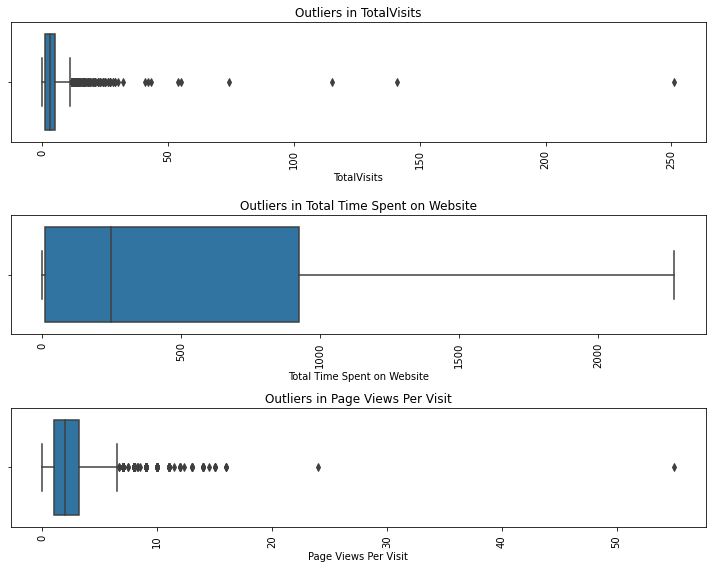

In [31]:
# Visualizing the spread of variable "TotalVisits"
def boxplot(x,fig,):
    plt.subplot(3,1,fig)
    sns.boxplot(x = x, data = df)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)
plt.figure(figsize =(10,8))
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [32]:
# Checking percentile values 
df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,482.887481,3.456028,2.370151
std,545.256560,4.858802,2.160871
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,3.000000,2.000000
75%,922.750000,5.000000,3.200000
90%,1373.000000,7.000000,5.000000


In [33]:
# Imputing outliers using the Percentiles (=1 and =99)

P1 = df['TotalVisits'].quantile(0.01)
P95 = df['TotalVisits'].quantile(0.95)
df['TotalVisits'][df['TotalVisits'] <= P1]  = P1
df['TotalVisits'][df['TotalVisits'] >= P95] = P95

P1 = df['Page Views Per Visit'].quantile(0.01)
P95 = df['Page Views Per Visit'].quantile(0.95)
df['Page Views Per Visit'][df['Page Views Per Visit'] <= P1]  = P1
df['Page Views Per Visit'][df['Page Views Per Visit'] >= P95] = P95

P1 = df['Total Time Spent on Website'].quantile(0.01)
P95 = df['Total Time Spent on Website'].quantile(0.95)
df['Total Time Spent on Website'][df['Total Time Spent on Website'] <= P1]  = P1
df['Total Time Spent on Website'][df['Total Time Spent on Website'] >= P95] = P95

In [34]:
# Checking the Percentage of rows retained in data cleaning process
print("Initial rows = ",initial_rows)
print("Final rows after data cleaning = ",df.shape[0])
print("Percentage of rows retained in data cleaning process = {} %".format(round(100*df.shape[0]/initial_rows,2)))

Initial rows =  9240
Final rows after data cleaning =  9074
Percentage of rows retained in data cleaning process = 98.2 %


## Step 3.5 Identifying the columns with high number of categories but less percentage of data in them

We can reduce such levels with less than 1% data for a given column with "Others". We can reduce the levels of such catgeorical variables and at a later point we have to create less dummy variables.

In [35]:
var_list1=[]
for i in df.columns:
    if len(df[i].unique().tolist())>2 and len(df[i].unique().tolist())<40 and df[i].dtype=="object":
        print("There are {0} levels in column \"{1}\"".format(len(df[i].unique().tolist()),i))
        var_list1.append(i)
print("\n\nFinal List for Visualizing the Imbalance is:\n\n",var_list1)

There are 4 levels in column "Lead Origin"
There are 20 levels in column "Lead Source"
There are 17 levels in column "Last Activity"
There are 38 levels in column "Country"
There are 18 levels in column "Specialization"
There are 6 levels in column "What is your current occupation"
There are 3 levels in column "What matters most to you in choosing a course"
There are 26 levels in column "Tags"
There are 6 levels in column "City"
There are 16 levels in column "Last Notable Activity"


Final List for Visualizing the Imbalance is:

 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']


In [36]:
# Replacing the level categories with less than equal to 1% data with "Other"
for i in var_list1:
    level = 100*df[i].value_counts(normalize=True,dropna=False)
    remov_level = list(level[level<=1].index)
    df[i] = df[i].replace(remov_level ,'Other')

In [37]:
for i in df.columns:
    if len(df[i].unique().tolist())>2 and len(df[i].unique().tolist())<40:
        print("There are {0} levels in column \"{1}\"".format(len(df[i].unique().tolist()),i))

There are 4 levels in column "Lead Origin"
There are 8 levels in column "Lead Source"
There are 11 levels in column "TotalVisits"
There are 9 levels in column "Last Activity"
There are 16 levels in column "Specialization"
There are 4 levels in column "What is your current occupation"
There are 12 levels in column "Tags"
There are 6 levels in column "City"
There are 7 levels in column "Last Notable Activity"


Note: We have now reduced the low data levels to combined category of "Other" for all variables with <40 levels initially

Next we will treat the missing values for numerical and categorical attributes

# Step 4 : Data Analysis & Reducing Skewness

## Step 4.1 Checking and removing Highly Skewed Categorical Columns

### Identifying and dropping columns with only 1 level

In [38]:
for i in df.columns:
    if len(df[i].unique().tolist())<2:
        print("In column \"{}\" there are following unique values:".format(i))
        print(df[i].unique().tolist())
        print()

In column "Magazine" there are following unique values:
['No']

In column "Receive More Updates About Our Courses" there are following unique values:
['No']

In column "Update me on Supply Chain Content" there are following unique values:
['No']

In column "Get updates on DM Content" there are following unique values:
['No']

In column "I agree to pay the amount through cheque" there are following unique values:
['No']



#### In this step, we can observe:

The columns like `Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque` have only 1 level `No`. Hence, we can drop them, as they are not useful in our model.

In [39]:
# Dropping all the columns with only 1 level
for i in df.columns:
    if len(df[i].unique().tolist())<2:
        df.drop(i, axis=1, inplace = True)
        print("Column \"{}\" was dropped".format(i))

Column "Magazine" was dropped
Column "Receive More Updates About Our Courses" was dropped
Column "Update me on Supply Chain Content" was dropped
Column "Get updates on DM Content" was dropped
Column "I agree to pay the amount through cheque" was dropped


### Identifying and dropping columns which are Highly Skewed Categorical Variables

In [40]:
var_list=[]
for i in df.columns:
    if len(df[i].unique().tolist())<=40:
        print("There are {0} levels in column \"{1}\"".format(len(df[i].unique().tolist()),i))
        var_list.append(i)
print("\n\nFinal List for Visualizing the Imbalance is:\n\n",var_list)

There are 4 levels in column "Lead Origin"
There are 8 levels in column "Lead Source"
There are 2 levels in column "Do Not Email"
There are 2 levels in column "Do Not Call"
There are 2 levels in column "Converted"
There are 11 levels in column "TotalVisits"
There are 9 levels in column "Last Activity"
There are 2 levels in column "Country"
There are 16 levels in column "Specialization"
There are 4 levels in column "What is your current occupation"
There are 2 levels in column "What matters most to you in choosing a course"
There are 2 levels in column "Search"
There are 2 levels in column "Newspaper Article"
There are 2 levels in column "X Education Forums"
There are 2 levels in column "Newspaper"
There are 2 levels in column "Digital Advertisement"
There are 2 levels in column "Through Recommendations"
There are 12 levels in column "Tags"
There are 6 levels in column "City"
There are 2 levels in column "A free copy of Mastering The Interview"
There are 7 levels in column "Last Notable

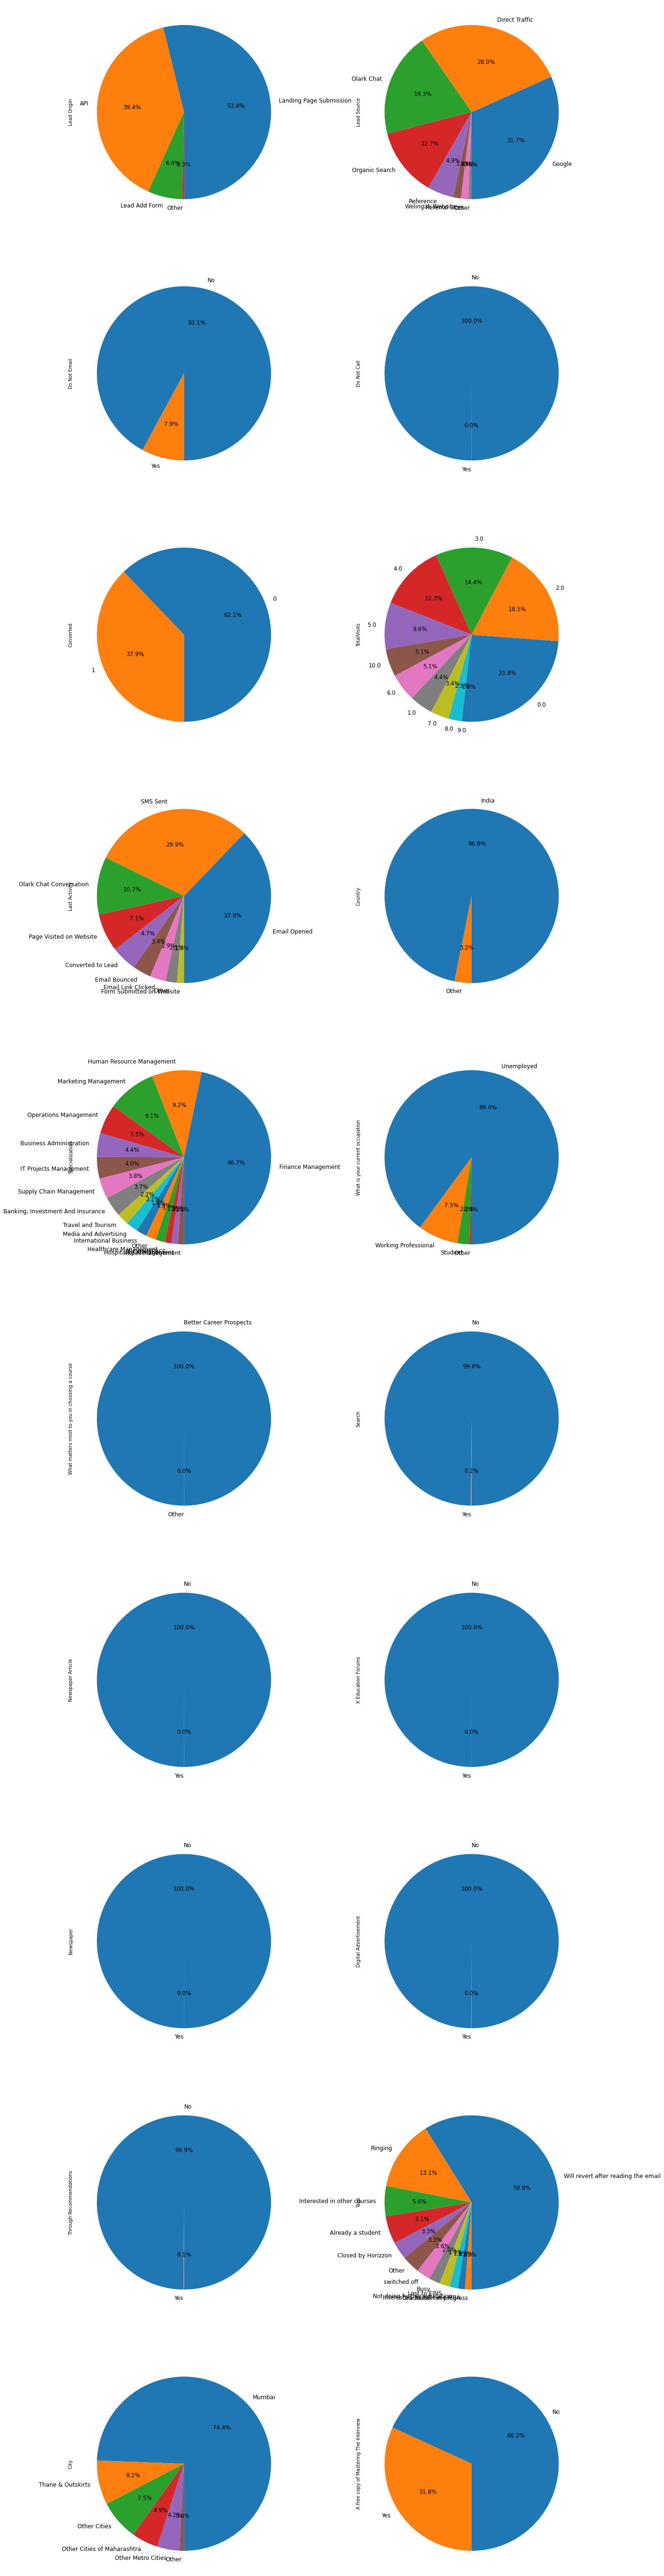

In [41]:
# Visualizing variables for imbalancing

fig, ax = plt.subplots(10, 2, figsize=(20, 100))
for variable, subplot in zip(var_list, ax.flatten()):
    df[variable].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%', startangle=270, fontsize=12, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()

#### In this step, we can observe:

The columns like `Do Not Email`, `Do Not Call`, `Country`, `What matters most to you in choosing a course`, `Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations` are highly skewed with one level having more than 90% of values.

In [42]:
df.drop(['Do Not Email', 'Do Not Call', 'Country', 
         'What matters most to you in choosing a course', 
         'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
         'Digital Advertisement', 'Through Recommendations'], axis=1, inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

## Step 4.2 Numerical column analysis

#### Analyzing "Converted" column which is the Target Variable

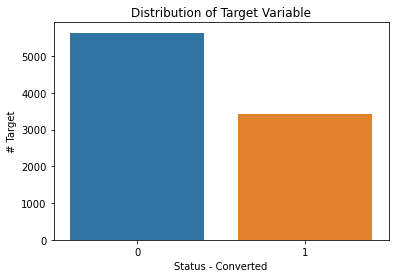

In [44]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df.Converted)
plt.xlabel("Status - Converted")
plt.ylabel("# Target")
plt.title("Distribution of Target Variable")
plt.show()

In [45]:
# Finding out conversion rate
conv_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
print("Conversion Rate is {} %".format(round(conv_rate,2)))

Conversion Rate is 37.86 %


Presently the lead converison rate is 37.86%

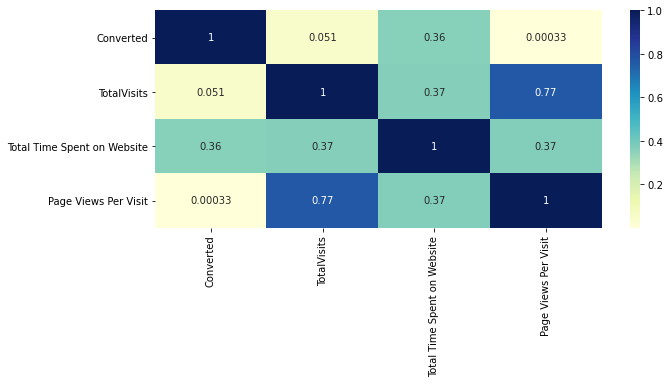

In [46]:
# Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,4))

# Heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Analyzing the column "TotalVisits"

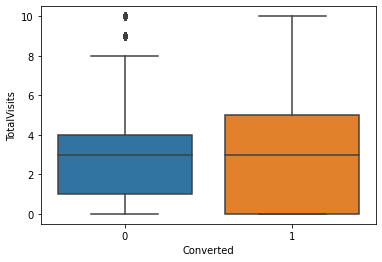

In [47]:
# Visualizing 'TotalVisits' w.r.t target variable 'Converted'
sns.boxplot(y= 'TotalVisits', x= 'Converted', data= df)
plt.show()

#### Inference:

 - Median for converted and not converted leads is almost same.
 - Nothing conclusive can be said on the basis of `TotalVisits`

### Analyzing the column "Total Time Spent on Website"

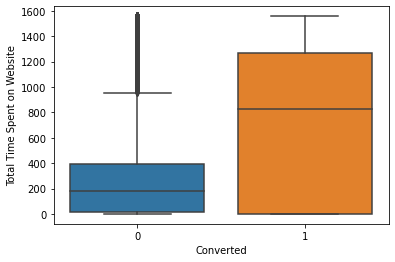

In [48]:
# Visualizing 'Total Time Spent on Website' w.r.t target variable 'Converted'
sns.boxplot(y= 'Total Time Spent on Website', x= 'Converted', data= df)
plt.show()

#### Inference
From the chart above, the leads spending more time on website are more likely to convert, thus website should be made more engaging to increase conversion rate.

### Analyzing the column "Page Views Per Visit"

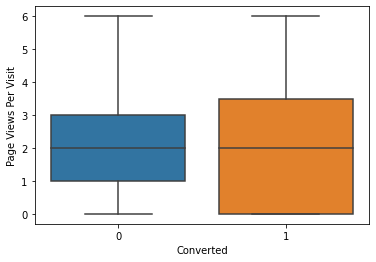

In [49]:
# Visualizing 'Page Views Per Visit' w.r.t target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

#### Inference:

 - Median for converted and not converted leads is almost same.
 - Nothing conclusive can be said on the basis of `Page Views Per Visit`

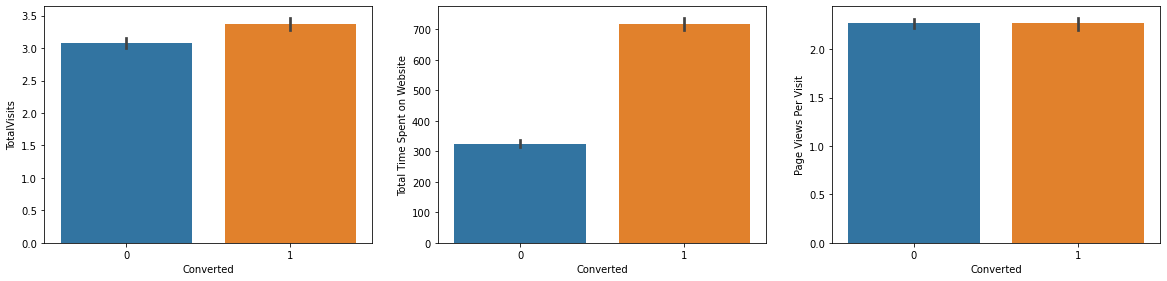

In [50]:
# Now checking the conversions for all numeric the values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y= 'TotalVisits', x='Converted', data= df)
plt.subplot(4,3,2)
sns.barplot(y= 'Total Time Spent on Website', x='Converted', data= df)
plt.subplot(4,3,3)
sns.barplot(y= 'Page Views Per Visit', x='Converted', data= df)
plt.show()

##### Inference:
 - The conversion rate is high for `TotalVisits` and `Total Time Spent on Website`

## Step 4.3 Removing "Sales team generated" variables (To avoid overfitting)

Next we will start "Sales team generated" variables vs the orginal variables from the form filled by customer.
From the below list, we get the "sales team generated" variables which we can make sure to drop as the EDA process is now complete:
 - Last Activity               
 - Tags                        
 - Lead Quality                
 - Lead Profile                
 - Asymmetrique Activity Index 
 - Asymmetrique Profile Index 
 - Asymmetrique Activity Score 
 - Asymmetrique Profile Score 
 - Last Notable Activity       
 
This step of removing the "Sales team generated" variables is done to avoid overfitting of model. The sales team gets an idea after interaction with customer that if the lead will convert or not. So we are removing these variables.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

In [52]:
# Dropping the following sales generated columns as the EDA is completed
df.drop(['Last Activity','Tags','Last Notable Activity'], axis=1, inplace = True)

In [53]:
# Percentage of rows retained in data cleaning process
print("Initial rows = ",initial_rows)
print("Final rows after data cleaning = ",df.shape[0])
print("Percentage of rows retained in data cleaning process = {} %".format(round(100*df.shape[0]/initial_rows,2)))

Initial rows =  9240
Final rows after data cleaning =  9074
Percentage of rows retained in data cleaning process = 98.2 %


#### Percentage of rows retained in data cleaning process & EDA = 98.2 %

#### Now, the data is in good shape and we will proceed to our next step of Data Preparation for Model Building


# Step 5 : Data Preparation for Model

### Step 5.1 :  Converting the binary variables to 0/1

In [54]:
# getting the list of binary variables
for i in df.columns:
    if len(df[i].unique().tolist())==2:
        print("There are {0} levels in column \"{1}\"".format(len(df[i].unique().tolist()),i))
        print(df[i].unique().tolist(),"\n")

There are 2 levels in column "Converted"
[0, 1] 

There are 2 levels in column "A free copy of Mastering The Interview"
['No', 'Yes'] 



In [55]:
#varlist for conversion from the above genrated list and excluding Coverted as it is already in 0 and 1
var_list =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[var_list] = df[var_list].apply(binary_map)

In [56]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Finance Management,Unemployed,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Finance Management,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Finance Management,Unemployed,Mumbai,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Specialization                          9074 non-null   object 
 7   What is your current occupation         9074 non-null   object 
 8   City                                    9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


### Step 5.2 : Dummy Variable Creation

In [58]:
# Getting a list of categorical columns foy creating dummy

categ_columns= df.select_dtypes(include=['object']).columns
categ_columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [59]:
# Getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(df[['Lead Origin']], prefix= 'Lead Origin')
dummy = dummy.drop(['Lead Origin_Other'], axis=1)
df    = pd.concat([df,dummy],axis= 1)

dummy = pd.get_dummies(df['Lead Source'], prefix= 'Lead Source')
dummy = dummy.drop(['Lead Source_Other'], axis=1)
df    = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['City'], prefix= 'City')
dummy = dummy.drop(['City_Other'], axis=1)
df    = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['What is your current occupation'], prefix= 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Other'], axis=1)
df    = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Specialization'], prefix= 'Specialization')
dummy = dummy.drop(['Specialization_Other'], axis=1)
df    = pd.concat([df, dummy], axis = 1)

In [60]:
# Dropping the original columns after dummy variable creation

df.drop(categ_columns, axis= 1, inplace= True)

In [61]:
# Checking the dataset after dummy variable creation
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Step 5.3 : Test-Train Split

In [62]:
# Importing library for the test-train split

from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variable to X
X=df.drop('Converted', axis=1)

# Checking head of X
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# Putting response/target variable to y
y = df['Converted']

# Checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5.4 : Feature Scaling

In [66]:
# Importing library for feature scaling

from sklearn.preprocessing import StandardScaler

In [67]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,474.472559,2.265943,0.318272,0.394313,0.538351,0.064029,0.280251,0.316619,0.193189,0.127177,0.048821,0.013776,0.014216,0.744104,0.074939,0.049151,0.041547,0.082103,0.022702,0.899162,0.074609,0.036919,0.043972,0.012233,0.467379,0.017192,0.012233,0.092242,0.040335,0.019396,0.090699,0.022261,0.054992,0.011020,0.038131,0.022261
std,0.485053,2.780618,526.060205,1.790991,0.465831,0.488730,0.498554,0.244818,0.449147,0.465183,0.394822,0.333189,0.215505,0.116565,0.118389,0.436388,0.263308,0.216196,0.199563,0.274536,0.148961,0.301130,0.262774,0.188573,0.205044,0.109929,0.498962,0.129993,0.109929,0.289383,0.196755,0.137920,0.287196,0.147541,0.227978,0.104404,0.191523,0.147541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,1557.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [69]:
# Standard scaling of features
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Checking the X-train dataset after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,-0.432779,-0.150296,-0.155018,1.473344,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.543632,-0.155018,-0.678728,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.904666,-1.265540,-0.678728,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4750,-0.432779,1.717578,-0.155018,-0.678728,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7987,0.643547,2.053909,0.122613,-0.678728,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [70]:
## Checking the conversion rate from y as it denotes the target variable

print("Conversion rate {} %".format(round((sum(y)/len(y.index))*100,2)))

Conversion rate 37.86 %


#### Checking the correlation coefficients to see which variables are highly correlated

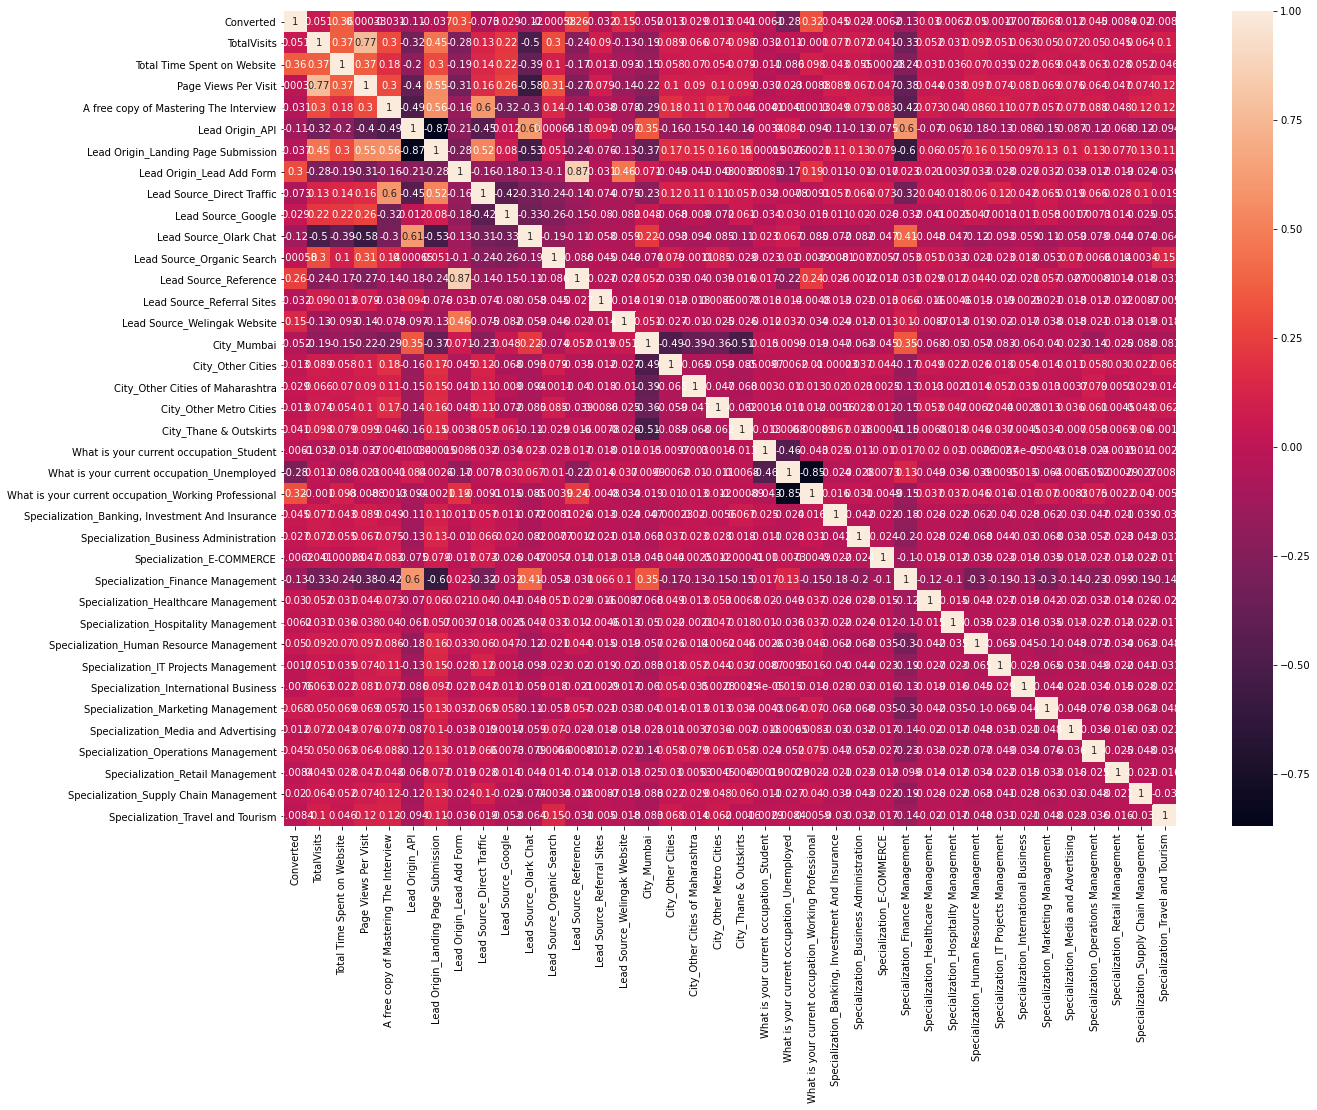

In [71]:
# Let's see the correlation matrix
plt.figure(figsize= (20,15))        # Size of the figure
sns.heatmap(df.corr(), annot= True)
plt.show()

#### Dropping highly correlated dummy variables

In [72]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

# Step 6: Model Building using Stats Model & RFE

In [73]:
# Importing necessary library
import statsmodels.api as sm

# To check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 6.1 : RFE Feature Selection

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_API', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('City_Mumbai', False, 6),
 ('City_Other Cities', False, 4),
 ('City_Other Cities of Maharashtra', False, 2),
 ('City_Other Metro Cities', False, 3),
 ('City_Thane & Outskirts', False, 5),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-COMMERCE'

In [77]:
# List of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [78]:
# List of RFE NOT supported columns
print(list(X_train.columns[~rfe.support_]))

['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_API', 'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Thane & Outskirts', 'Specialization_Business Administration', 'Specialization_E-COMMERCE', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Supply Chain Management']


### Step 6.2 : RFE Model (#1): The Model including the top 15 attributes from RFE in previous step

In [79]:
# Building Model 1 - Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3000.7
Date:                Sun, 08 Aug 2021   Deviance:                       6001.5
Time:                        20:57:38   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Lead Origin_Lead Add Form,62.70
5,Lead Source_Reference,48.00
7,Lead Source_Welingak Website,15.44
9,What is your current occupation_Unemployed,8.93
3,Lead Source_Google,3.36
2,Lead Source_Direct Traffic,3.30
12,Specialization_Finance Management,2.57
4,Lead Source_Organic Search,1.94
10,What is your current occupation_Working Professional,1.65
0,Total Time Spent on Website,1.30


### Step 6.3 : Model (#2): Recreating the Model 
Note: In the previous model, the p-value of `Lead Source_Reference` is high, so the variable if not significant. Hence we can drop this variable.

In [80]:
# Dropping column with high p-value from previous model
col = col.drop('Lead Source_Reference',1)

# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.8
Date:                Sun, 08 Aug 2021   Deviance:                       6003.6
Time:                        20:57:39   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
8,What is your current occupation_Unemployed,8.93
3,Lead Source_Google,3.36
2,Lead Source_Direct Traffic,3.30
11,Specialization_Finance Management,2.57
4,Lead Source_Organic Search,1.94
1,Lead Origin_Lead Add Form,1.80
9,What is your current occupation_Working Professional,1.65
6,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.30
7,What is your current occupation_Student,1.20


### Step 6.4 : Model (#3): Recreating the Model 
Note: In the previous model, the p-value of `What is your current occupation_Student` is high, so the variable if not significant. Hence we can drop this variable.

In [81]:
# Dropping column with high p-value from previous model
col = col.drop('What is your current occupation_Student',1)

# Building Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3003.2
Date:                Sun, 08 Aug 2021   Deviance:                       6006.4
Time:                        20:57:39   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
7,What is your current occupation_Unemployed,7.61
3,Lead Source_Google,3.03
2,Lead Source_Direct Traffic,2.88
10,Specialization_Finance Management,2.36
4,Lead Source_Organic Search,1.81
1,Lead Origin_Lead Add Form,1.74
8,What is your current occupation_Working Professional,1.56
6,Lead Source_Welingak Website,1.35
0,Total Time Spent on Website,1.29
5,Lead Source_Referral Sites,1.08


### Step 6.5 : Model (#4): Recreating the Model 
Note: In the previous model, the p-value of `Specialization_Hospitality Management` is high, so the variable if not significant. Hence we can drop this variable.

In [82]:
# Dropping column with high p-value from previous model
col = col.drop('Specialization_Hospitality Management',1)

# Building Model 4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3004.6
Date:                Sun, 08 Aug 2021   Deviance:                       6009.3
Time:                        20:57:40   Pearson chi2:                 6.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
7,What is your current occupation_Unemployed,7.58
3,Lead Source_Google,3.03
2,Lead Source_Direct Traffic,2.88
10,Specialization_Finance Management,2.34
4,Lead Source_Organic Search,1.81
1,Lead Origin_Lead Add Form,1.74
8,What is your current occupation_Working Professional,1.55
6,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.29
5,Lead Source_Referral Sites,1.08


### Step 6.6 : Model (#5): Recreating the Model 
Note: In the previous model, the p-value of `What is your current occupation_Unemployed` is high, so the variable if not significant. Hence we can drop this variable.

In [83]:
# Dropping column with high p-value from previous model
col = col.drop('What is your current occupation_Unemployed',1)

# Building Model 5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3006.2
Date:                Sun, 08 Aug 2021   Deviance:                       6012.4
Time:                        20:57:40   Pearson chi2:                 6.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
9,Specialization_Finance Management,1.54
1,Lead Origin_Lead Add Form,1.51
3,Lead Source_Google,1.36
6,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.23
7,What is your current occupation_Working Professional,1.17
4,Lead Source_Organic Search,1.16
2,Lead Source_Direct Traffic,1.15
8,"Specialization_Banking, Investment And Insurance",1.06
10,Specialization_Travel and Tourism,1.05


### Step 6.7 : Model (#6): Recreating the Model 
Note: In the previous model, the p-value of `Specialization_Travel and Tourism` is high, so the variable if not significant. Hence we can drop this variable.

In [84]:
# Dropping column with high p-value from previous model
col = col.drop('Specialization_Travel and Tourism',1)

# Building Model 6
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
print(res.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3008.1
Date:                Sun, 08 Aug 2021   Deviance:                       6016.3
Time:                        20:57:41   Pearson chi2:                 6.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
9,Specialization_Finance Management,1.53
1,Lead Origin_Lead Add Form,1.51
3,Lead Source_Google,1.35
6,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.22
7,What is your current occupation_Working Professional,1.17
2,Lead Source_Direct Traffic,1.13
4,Lead Source_Organic Search,1.11
8,"Specialization_Banking, Investment And Insurance",1.06
5,Lead Source_Referral Sites,1.03


#### Since the Model 6 seems to be stable with significant p-values and minimal multicollinearity. We can proceed with this model for further analysis

### Step 6.8 Predicting a Train model

In [85]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13437868, 0.61382263, 0.20965729, 0.65736081, 0.66289636,
       0.47932036, 0.09728212, 0.81115871, 0.73865191, 0.63295152])

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted
0,0,0.134379,3009,0
1,0,0.613823,1012,1
2,0,0.209657,9226,0
3,1,0.657361,4750,1
4,1,0.662896,7987,1


### Step 6.9 Metrics: Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value & Negative Predictive Value

In [87]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3405  500]
 [ 883 1563]]


In [88]:
# Let's check the overall accuracy.
print("Accuracy is {} %".format(round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)))

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity is {} %".format(round(100*TP/float(TP+FN),2)))

# Let us calculate specificity
print("Specificity is {} %".format(round(100*TN/float(TN+FP),2)))

# Calculate False Postive Rate - predicting conversion when customer does not have convert
print("False Postive Rate is {} %".format(round(100*FP/float(TN+FP),2)))

# positive predictive value
print("Positive predictive value is {} %".format(round(100*TP/float(TP+FP),2)))
# Negative predictive value
print("Negative predictive value is {} %".format(round(100*TN/float(TN+ FN),2)))

Accuracy is 78.22 %
Sensitivity is 63.9 %
Specificity is 87.2 %
False Postive Rate is 12.8 %
Positive predictive value is 75.76 %
Negative predictive value is 79.41 %


### Step 6.10 Plotting the ROC Curve

An ROC curve demonstrates several things:<br>

<ul><li>It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).</li>
<li>The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.</li>
<li>The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.</li></ul>

In [89]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False)

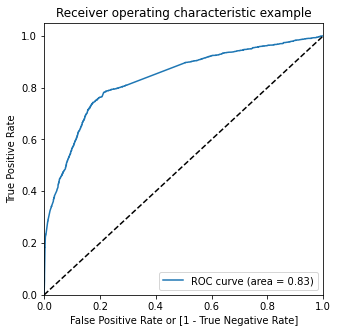

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<B>The ROC Curve should be a value close to 1. We are getting a good value of 0.83 indicating a good predictive model.</B>

### Step 6.11 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [92]:
# Let's create columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134379,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.613823,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.209657,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.657361,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.662896,7987,1,1,1,1,1,1,1,1,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.438986  0.982829  0.098335
0.2   0.2  0.638954  0.900654  0.475032
0.3   0.3  0.787435  0.759199  0.805122
0.4   0.4  0.792631  0.710139  0.844302
0.5   0.5  0.782239  0.639002  0.871959
0.6   0.6  0.769957  0.558872  0.902177
0.7   0.7  0.753425  0.451349  0.942638
0.8   0.8  0.726185  0.321341  0.979770
0.9   0.9  0.685876  0.189289  0.996927


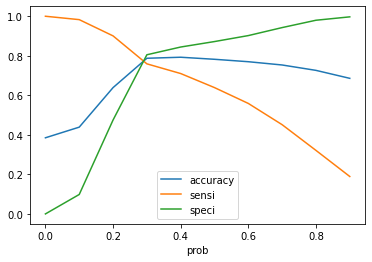

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ProspectID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.134379,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.613823,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.209657,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.657361,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.662896,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [96]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','ProspectID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,ProspectID,final_Predicted,Lead_Score
0,0,0.134379,3009,0,13
1,0,0.613823,1012,1,61
2,0,0.209657,9226,0,21
3,1,0.657361,4750,1,66
4,1,0.662896,7987,1,66


In [97]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1857
0     589
Name: final_Predicted, dtype: int64

In [98]:
# check the precentage of final_predicted conversions
1857/float(1857+589)

0.759198691741619

#### We can see that the final prediction of conversions have a of 76% target conversion as per the X Educations CEO's requirement. Hence, we can say that the model is okay.

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [99]:
# Let's check the overall accuracy.
print("Accuracy is {} %".format(round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted),2)))

Accuracy is 78.74 %


In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3144,  761],
       [ 589, 1857]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity is {} %".format(round(100*TP/float(TP+FN),2)))

# Let us calculate specificity
print("Specificity is {} %".format(round(100*TN/float(TN+FP),2)))


Sensitivity is 75.92 %
Specificity is 80.51 %


#### Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.83, which is very good. We have the following values for the Train Data:

 - Accuracy    : 78.7%
 - Sensitivity : 75.9%
 - Specificity : 80.5%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [102]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print("False Postive Rate is {} %".format(round(100*FP/float(TN+FP),2)))

# Positive predictive value
print("Positive predictive value is {} %".format(round(100*TP/float(TP+FP),2)))
# Negative predictive value
print("Negative predictive value is {} %".format(round(100*TN/float(TN+ FN),2)))

False Postive Rate is 19.49 %
Positive predictive value is 70.93 %
Negative predictive value is 84.22 %


### Precision and Recall

In [103]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3144,  761],
       [ 589, 1857]], dtype=int64)

In [104]:
##### Precision TP / TP + FP
print("Precision = {}".format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))

##### Recall TP / TP + FN
print("Recall = {}".format(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Precision = 0.7093200916730329
Recall = 0.759198691741619


In [105]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7093200916730329

In [106]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.759198691741619

### Precision and Recall Trade-off


In [107]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [108]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

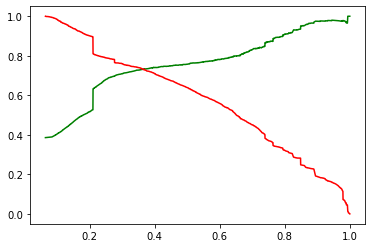

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on  the test set

In [110]:
#Scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3271,0.284772,-0.606338,0.955505,-0.678728,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.643547,1.970301,1.510766,1.473344,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,-0.432779,-0.764053,-0.155018,-0.678728,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-1.150329,-0.904666,-1.265540,-0.678728,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.719873,-0.593037,2.066027,1.473344,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [111]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Finance Management
3271,-0.606338,0,0,1,0,0,0,0,0,1
1490,1.970301,0,1,0,0,0,0,1,0,0
7936,-0.764053,0,0,1,0,0,0,0,0,1
4216,-0.904666,1,0,0,0,0,0,0,0,0
3830,-0.593037,0,0,0,1,0,0,0,0,0


In [112]:
X_test_sm = sm.add_constant(X_test)

In [113]:
X_test_sm.shape

(2723, 11)

In [114]:
y_test_pred = res.predict(X_test_sm)  
y_test_pred[:10]

3271    0.130913
1490    0.976384
7936    0.111592
4216    0.889283
3830    0.154310
1800    0.744943
6507    0.169180
4821    0.224614
4223    0.848218
4714    0.209657
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
3271,0.130913
1490,0.976384
7936,0.111592
4216,0.889283
3830,0.154310


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,3271,0.130913
1,1,1490,0.976384
2,0,7936,0.111592
3,1,4216,0.889283
4,0,3830,0.154310


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [122]:
y_pred_final.head()

,Converted,ProspectID,Converted_Prob
0,0,3271,0.130913
1,1,1490,0.976384
2,0,7936,0.111592
3,1,4216,0.889283
4,0,3830,0.154310


#### Assigning Lead Score

In [123]:
# Rearranging the columns
y_pred_final = y_pred_final[['ProspectID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [124]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,Lead_Score
0,3271,0,0.130913,13
1,1490,1,0.976384,98
2,7936,0,0.111592,11
3,4216,1,0.889283,89
4,3830,0,0.154310,15


In [125]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [126]:
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,3271,0,0.130913,13,0
1,1490,1,0.976384,98,1
2,7936,0,0.111592,11,0
3,4216,1,0.889283,89,1
4,3830,0,0.154310,15,0


In [127]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    741
0    248
Name: final_Predicted, dtype: int64

In [128]:
# check the precentage of final_predicted conversions on test data

741/float(741+248)

0.7492416582406471

#### We can see that the final prediction of conversions have a target rate of 75%  (same as predictions made on training data set)

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.794344473007712

In [130]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1422,  312],
       [ 248,  741]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity is {} %".format(round(100*TP/float(TP+FN),2)))

# Let us calculate specificity
print("Specificity is {} %".format(round(100*TN/float(TN+FP),2)))

Sensitivity is 74.92 %
Specificity is 82.01 %


<b><font color = green size =3>Precision and Recall metrics for the test set

In [132]:
##### Precision TP / TP + FP
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7037037037037037

In [133]:
##### Recall TP / TP + FN
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7492416582406471

#### Inference:
After running the model on the Test Data , following are the metric values:

 - Accuracy : 79.4%
 - Sensitivity :74.9%
 - Specificity : 82.0%

### Conclusion:


- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 79%, 75% and 82% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 76%
- Hence overall this model seems to be okay.   

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:
 - Lead Origin_Lead Add Form
 - What is your current occupation_Working Professional
 - Lead Source_Welingak Website